In [11]:
from itertools import combinations

import pandas as pd
import numpy as np
import scipy.sparse as sp
from scipy.sparse import coo_matrix
from lightfm import LightFM
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
date_cols = ['expiration_date', 'registration_init_time']

train_data = pd.read_csv('music_data_raw/train_data_updated.csv', parse_dates=date_cols)
test_data = pd.read_csv('music_data_raw/test_data_updated.csv', parse_dates=date_cols)
all_data = pd.concat([train_data, test_data])
all_data[:3]

Unnamed: 0   msno  song_id  source_screen_name  source_system_tab  \
0           0   9176    86884                   7                  1   
1           1  19273   260594                   8                  3   
2           2  19273   140755                   8                  3   

   source_type  target  song_length  genre_ids  artist_name  composer  \
0            7     1.0     206471.0        307         3784     16653   
1            4     1.0     284584.0         97        36867     74276   
2            4     1.0     225396.0         97        24601     51540   

   lyricist  language  city  bd  gender  registered_via  \
0     26024         9     0   0       2               2   
1     26024         9    11  24       0               3   
2     26024         9    11  24       0               3   

  registration_init_time expiration_date          time  
0             2012-01-02      2017-10-05  0.000000e+00  
1             2011-05-25      2017-09-11  1.006623e-07  
2             2011-05-25      2017-09-11  2.013246e-07

In [15]:
print(all_data.shape)
print(np.count_nonzero(all_data['target'])/all_data.shape[0])

(9934208, 20)
0.6312980360387058


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 20 columns):
Unnamed: 0                int64
msno                      int64
song_id                   int64
source_screen_name        int64
source_system_tab         int64
source_type               int64
target                    float64
song_length               float64
genre_ids                 int64
artist_name               int64
composer                  int64
lyricist                  int64
language                  int64
city                      int64
bd                        int64
gender                    int64
registered_via            int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
time                      float64
dtypes: datetime64[ns](2), float64(3), int64(15)
memory usage: 390.1 MB


In [4]:
catCols = ['msno', 'song_id', 'source_screen_name', 'source_system_tab', 'source_type', 'genre_ids', 'artist_name', 
           'composer', 'lyricist', 'language', 'city', 'gender', 'registered_via']
numCols = ['bd', 'song_length']

(0, 100)

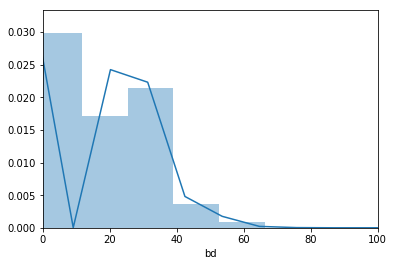

In [9]:
vis1 = sns.distplot(test_data["bd"], bins = 80)
plt.xlim(0, 100)